In [ ]:
import fastf1

# Example Code: Analyze Historical Tire Strategies

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Define the session details
year = 2023
gran_prix = "Monza"
sessionG = 'R'  # Race session

# Load the race session
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Get all laps
laps = session.laps

# Group laps by driver and stint to analyze tire usage
stints = laps.groupby(["Driver", "Stint", "Compound"]).size().reset_index(name="LapCount")

# Print the results
print("Tire usage by driver and stint:")
print(stints)

req         WARNING 	DEFAULT CACHE ENABLED! (2.71 GB) C:\Users\dilau\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track

Tire usage by driver and stint:
   Driver  Stint Compound  LapCount
0     ALB    1.0   MEDIUM        15
1     ALB    2.0     HARD        37
2     ALO    1.0   MEDIUM        21
3     ALO    2.0     HARD        31
4     BOT    1.0     HARD        25
5     BOT    2.0   MEDIUM        26
6     GAS    1.0   MEDIUM        10
7     GAS    2.0     HARD        21
8     GAS    3.0   MEDIUM        20
9     HAM    1.0     HARD        27
10    HAM    2.0   MEDIUM        25
11    HUL    1.0   MEDIUM        14
12    HUL    2.0     HARD        25
13    HUL    3.0   MEDIUM        12
14    LAW    1.0   MEDIUM        13
15    LAW    2.0     HARD        20
16    LAW    3.0   MEDIUM        18
17    LEC    1.0   MEDIUM        20
18    LEC    2.0     HARD        32
19    MAG    1.0     HARD        12
20    MAG    2.0   MEDIUM        21
21    MAG    3.0   MEDIUM        18
22    NOR    1.0   MEDIUM        22
23    NOR    2.0     HARD        30
24    OCO    1.0   MEDIUM        24
25    OCO    2.0     HARD       

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


Average lap times by compound:
  Compound                   LapTime
0     HARD 0 days 00:01:26.895443974
1   MEDIUM 0 days 00:01:27.066629539


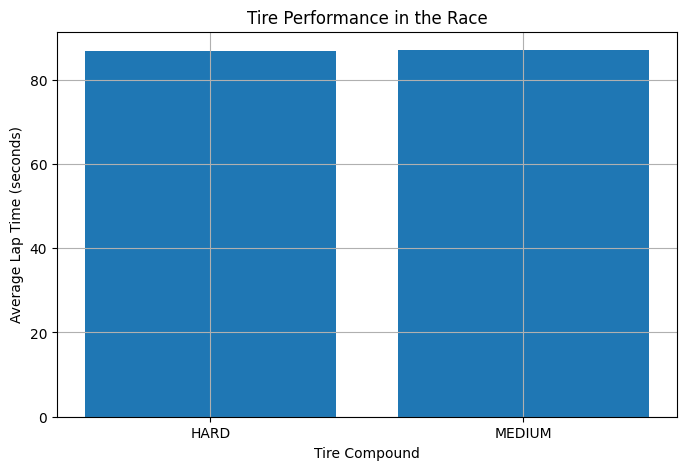

In [ ]:
import fastf1
import matplotlib.pyplot as plt

# Example Code: Analyze Tire Performance

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Define the session details
year = 2023
gran_prix = "Monza"
sessionG = 'R'  # Race session

# Load the race session
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Get all laps
laps = session.laps

# Filter out slow laps (e.g., in-laps, out-laps)
quick_laps = laps.pick_quicklaps()

# Group by compound and calculate average lap time
compound_performance = quick_laps.groupby("Compound")["LapTime"].mean().reset_index()

# Print the results
print("Average lap times by compound:")
print(compound_performance)

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(compound_performance["Compound"], compound_performance["LapTime"].dt.total_seconds())
plt.xlabel("Tire Compound")
plt.ylabel("Average Lap Time (seconds)")
plt.title("Tire Performance in the Race")
plt.grid()
plt.show()

In [17]:
import fastf1
import pandas as pd

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Define the session details
year = 2023
gran_prix = "Monza"
sessionG = 'R'  # Race session

# Load the race session
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Get all laps
laps = session.laps

# Filter out slow laps (e.g., in-laps, out-laps)
quick_laps = laps.pick_quicklaps()

# Calculate average lap times and degradation rates for each compound
compound_data = quick_laps.groupby("Compound").agg(
    avg_lap_time=("LapTime", lambda x: x.mean().total_seconds()),
    degradation_rate=("LapTime", lambda x: (x.max() - x.min()).total_seconds() / len(x))
).reset_index()

# Print the results
print("Tire compound performance:")
print(compound_data)

# Simulate strategies
race_laps = 53  # Total laps in the race
strategies = [
    {"stints": [("SOFT", 20), ("MEDIUM", 33)]},  # 1-stop strategy
    {"stints": [("SOFT", 15), ("MEDIUM", 20), ("HARD", 18)]},  # 2-stop strategy
]

# Calculate total race time for each strategy
for strategy in strategies:
    total_time = 0
    valid_strategy = True  # Flag to check if all compounds in the strategy are valid
    for compound, stint_length in strategy["stints"]:
        # Check if the compound exists in the data
        if compound in compound_data["Compound"].values:
            avg_lap_time = compound_data[compound_data["Compound"] == compound]["avg_lap_time"].values[0]
            total_time += avg_lap_time * stint_length
        else:
            print(f"Warning: No data found for compound {compound}. Skipping this strategy.")
            valid_strategy = False
            break
    
    if valid_strategy:
        print(f"Strategy {strategy['stints']}: Total race time = {total_time:.2f} seconds")

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


Tire compound performance:
  Compound  avg_lap_time  degradation_rate
0     HARD     86.895443          0.011892
1   MEDIUM     87.066629          0.014194


In [18]:
import fastf1
import pandas as pd

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Define the session details
year = 2023
gran_prix = "Monza"
sessionG = 'R'  # Race session

# Load the race session
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Get all laps
laps = session.laps

# Filter out slow laps (e.g., in-laps, out-laps)
quick_laps = laps.pick_quicklaps()

# Calculate average lap times and degradation rates for each compound
compound_data = quick_laps.groupby("Compound").agg(
    avg_lap_time=("LapTime", lambda x: x.mean().total_seconds()),
    degradation_rate=("LapTime", lambda x: (x.max() - x.min()).total_seconds() / len(x))
).reset_index()

# Print the results
print("Tire compound performance:")
print(compound_data)

# Default lap times for missing compounds
default_lap_times = {
    "SOFT": 90.0,   # Default lap time for SOFT tires (in seconds)
    "MEDIUM": 91.0, # Default lap time for MEDIUM tires (in seconds)
    "HARD": 92.0    # Default lap time for HARD tires (in seconds)
}

# Simulate strategies
race_laps = 53  # Total laps in the race
strategies = [
    {"stints": [("SOFT", 20), ("MEDIUM", 33)]},  # 1-stop strategy
    {"stints": [("SOFT", 15), ("MEDIUM", 20), ("HARD", 18)]},  # 2-stop strategy
]

# Calculate total race time for each strategy
for strategy in strategies:
    total_time = 0
    for compound, stint_length in strategy["stints"]:
        # Check if the compound exists in the data
        if compound in compound_data["Compound"].values:
            avg_lap_time = compound_data[compound_data["Compound"] == compound]["avg_lap_time"].values[0]
        else:
            # Use default lap time if the compound is missing
            avg_lap_time = default_lap_times.get(compound, 92.0)  # Default to 92.0 if compound is not in the dictionary
            print(f"Warning: Using default lap time for compound {compound}.")
        
        # Add to total race time
        total_time += avg_lap_time * stint_length
    
    # Print the total race time for the strategy
    print(f"Strategy {strategy['stints']}: Total race time = {total_time:.2f} seconds")

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


Tire compound performance:
  Compound  avg_lap_time  degradation_rate
0     HARD     86.895443          0.011892
1   MEDIUM     87.066629          0.014194
Strategy [('SOFT', 20), ('MEDIUM', 33)]: Total race time = 4673.20 seconds
Strategy [('SOFT', 15), ('MEDIUM', 20), ('HARD', 18)]: Total race time = 4655.45 seconds
